In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler # chuẩn hóa dữ liệu

# Các lớp mô hình
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_FPT = pd.read_csv('/content/drive/My Drive/FPT.csv')
df_FPT.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [ ]:
df_FPT['Date/Time']=pd.to_datetime(df_FPT['Date/Time'],infer_datetime_format=True) # định dang lại cấu trúc thời gian
df_FPT.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0


In [ ]:
df_FPT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Ticker         97406 non-null  object        
 1   Date/Time      97406 non-null  datetime64[ns]
 2   Open           97406 non-null  float64       
 3   High           97406 non-null  float64       
 4   Low            97406 non-null  float64       
 5   Close          97406 non-null  float64       
 6   Volume         97406 non-null  int64         
 7   Open Interest  97406 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 5.9+ MB


In [ ]:
df_FPT.describe()

,Open,High,Low,Close,Volume,Open Interest
count,97406.000000,97406.000000,97406.000000,97406.000000,9.740600e+04,97406.0
mean,45.071630,45.090138,45.051430,45.071631,8.044173e+03,0.0
std,6.359803,6.364950,6.354245,6.359799,1.753203e+04,0.0
min,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0
25%,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0
50%,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0
75%,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0
max,58.400000,58.500000,58.400000,58.400000,1.255930e+06,0.0


In [ ]:
# Lấy dữ liệu
df_FPT1 = pd.DataFrame(df_FPT,columns=['Date/Time','Close'])
df_FPT1.index = df_FPT1['Date/Time']
df_FPT1.drop('Date/Time', axis=1, inplace= True)

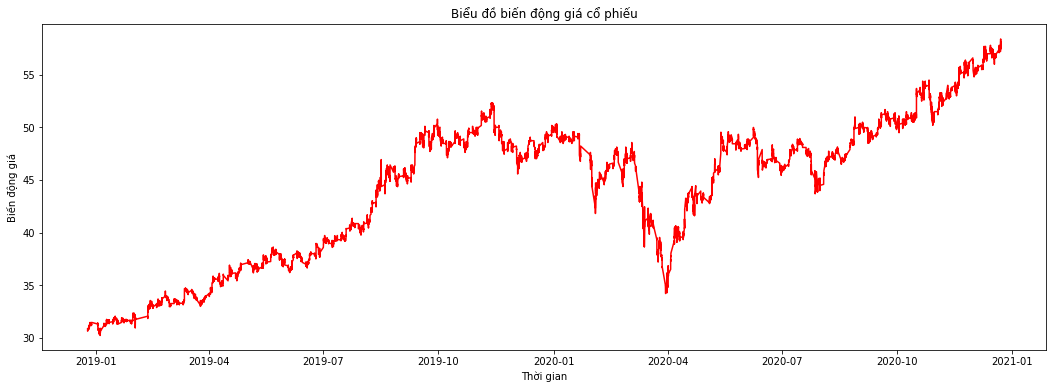

In [ ]:
#Biểu đồ biến động giá cổ phiếu
plt.figure(figsize=(18,6)) # tùy chỉnh kích thước biểu đồ
plt.plot(df_FPT1['Close'],label= 'Biến động thực tế', color= 'red')
plt.title('Biểu đồ biến động giá cổ phiếu')
plt.xlabel('Thời gian')
plt.ylabel('Biến động giá')
plt.show()

In [ ]:
df_FPT1

,Close
Date/Time,
2018-12-25 09:15:00,30.89
2018-12-25 09:16:00,30.81
2018-12-25 09:17:00,30.74
2018-12-25 09:18:00,30.74
2018-12-25 09:19:00,30.74
...,...
2020-12-22 14:24:00,58.20
2020-12-22 14:25:00,58.20
2020-12-22 14:26:00,58.20


In [ ]:
data = df_FPT1.values
train_data=df_FPT1[:70000]
test_data=df_FPT1[70000:]

In [ ]:
data

array([[30.89],
       [30.81],
       [30.74],
       ...,
       [58.2 ],
       [58.1 ],
       [58.1 ]])

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)

In [ ]:
x_train,y_train=[],[]

for i in range(50,len(train_data)):
    x_train.append(scaled_data[i-50:i,0])
    y_train.append(scaled_data[i,0])

In [ ]:
x_train

[array([0.02273535, 0.01989343, 0.01740675, 0.01740675, 0.01740675,
        0.01740675, 0.01456483, 0.03055062, 0.03339254, 0.03339254,
        0.03197158, 0.03055062, 0.03055062, 0.03055062, 0.03339254,
        0.03339254, 0.03055062, 0.03445826, 0.03445826, 0.02806394,
        0.02806394, 0.02522202, 0.02522202, 0.02522202, 0.02522202,
        0.02273535, 0.02273535, 0.02522202, 0.02273535, 0.02273535,
        0.02522202, 0.02522202, 0.02806394, 0.03339254, 0.03055062,
        0.03197158, 0.03197158, 0.03055062, 0.03055062, 0.03055062,
        0.03055062, 0.03339254, 0.03339254, 0.03339254, 0.03055062,
        0.03055062, 0.03055062, 0.03055062, 0.03055062, 0.03197158]),
 array([0.01989343, 0.01740675, 0.01740675, 0.01740675, 0.01740675,
        0.01456483, 0.03055062, 0.03339254, 0.03339254, 0.03197158,
        0.03055062, 0.03055062, 0.03055062, 0.03339254, 0.03339254,
        0.03055062, 0.03445826, 0.03445826, 0.02806394, 0.02806394,
        0.02522202, 0.02522202, 0.02522202, 0.

In [ ]:
y_train

[0.03197158081705154,
 0.030550621669626965,
 0.03197158081705154,
 0.030550621669626965,
 0.03197158081705154,
 0.030550621669626965,
 0.030550621669626965,
 0.030550621669626965,
 0.030550621669626965,
 0.030550621669626965,
 0.03197158081705154,
 0.03197158081705154,
 0.03197158081705154,
 0.030550621669626965,
 0.030550621669626965,
 0.030550621669626965,
 0.030550621669626965,
 0.030550621669626965,
 0.030550621669626965,
 0.029129662522202615,
 0.029129662522202615,
 0.029129662522202615,
 0.029129662522202615,
 0.029129662522202615,
 0.028063943161634075,
 0.029129662522202615,
 0.028063943161634075,
 0.029129662522202615,
 0.028063943161634075,
 0.030550621669626965,
 0.030550621669626965,
 0.030550621669626965,
 0.028063943161634075,
 0.028063943161634075,
 0.026642984014209725,
 0.028063943161634075,
 0.028063943161634075,
 0.025222024866785153,
 0.025222024866785153,
 0.025222024866785153,
 0.024156305506216835,
 0.025222024866785153,
 0.025222024866785153,
 0.02806394316163

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train=np.reshape(y_train,(y_train.shape[0],1))

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train,y_train,epochs=50,batch_size=50,verbose=2)

Epoch 1/50
1399/1399 - 12s - loss: 0.0023 - 12s/epoch - 8ms/step
Epoch 2/50
1399/1399 - 10s - loss: 7.3077e-04 - 10s/epoch - 7ms/step
Epoch 3/50
1399/1399 - 9s - loss: 4.0177e-04 - 9s/epoch - 7ms/step
Epoch 4/50
1399/1399 - 9s - loss: 2.7655e-04 - 9s/epoch - 6ms/step
Epoch 5/50
1399/1399 - 9s - loss: 2.5862e-04 - 9s/epoch - 6ms/step
Epoch 6/50
1399/1399 - 10s - loss: 2.5243e-04 - 10s/epoch - 7ms/step
Epoch 7/50
1399/1399 - 9s - loss: 2.5389e-04 - 9s/epoch - 6ms/step
Epoch 8/50
1399/1399 - 8s - loss: 2.5048e-04 - 8s/epoch - 6ms/step
Epoch 9/50
1399/1399 - 9s - loss: 2.4628e-04 - 9s/epoch - 6ms/step
Epoch 10/50
1399/1399 - 9s - loss: 2.4686e-04 - 9s/epoch - 6ms/step
Epoch 11/50
1399/1399 - 9s - loss: 2.4706e-04 - 9s/epoch - 6ms/step
Epoch 12/50
1399/1399 - 9s - loss: 2.4404e-04 - 9s/epoch - 6ms/step
Epoch 13/50
1399/1399 - 9s - loss: 2.4491e-04 - 9s/epoch - 6ms/step
Epoch 14/50
1399/1399 - 8s - loss: 2.3998e-04 - 8s/epoch - 6ms/step
Epoch 15/50
1399/1399 - 10s - loss: 2.4064e-04 - 10s/ep

In [ ]:
y_train_predict=lstm_model.predict(x_train)
y_train_predict=scaler.inverse_transform(y_train_predict)

2186/2186 [==============================] - 8s 3ms/step


In [ ]:
inputs_data=df_FPT1[len(train_data)-50:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

x_test=[]
for i in range(50,inputs_data.shape[0]):
    x_test.append(inputs_data[i-50:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

y_test = data[70000:]
y_test_predict=lstm_model.predict(x_test)
y_test_predict=scaler.inverse_transform(y_test_predict)

857/857 [==============================] - 4s 4ms/step


<ipython-input-52-603fba3892cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_datal['Dự đoán']= y_train_predict
<ipython-input-52-603fba3892cc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_datal['Dự đoán']= y_test_predict


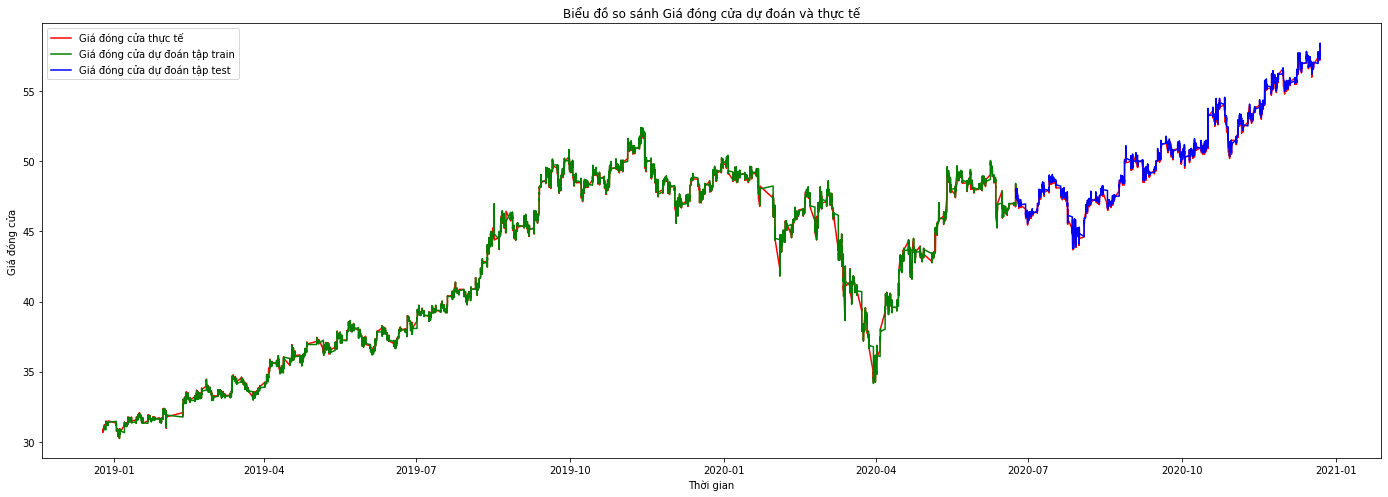

In [ ]:
train_datal=df_FPT1[50:70000]
test_datal=df_FPT1[70000:]

plt.figure(figsize= (24,8))
plt.plot(df_FPT1, label= 'Giá đóng cửa thực tế', color= 'red')
train_datal['Dự đoán']= y_train_predict
plt.plot(train_datal['Dự đoán'], label= 'Giá đóng cửa dự đoán tập train', color= 'green')
test_datal['Dự đoán']= y_test_predict
plt.plot(test_datal['Dự đoán'], label= 'Giá đóng cửa dự đoán tập test', color= 'blue')
plt.title('Biểu đồ so sánh Giá đóng cửa dự đoán và thực tế')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa')
plt.legend()
plt.show()

In [ ]:
y_train=scaler.inverse_transform(y_train)
print('Độ phù hợp tập train:',r2_score(y_train,y_train_predict))
print('Sai số tuyệt đối trung bình tập train:',mean_squared_error(y_train,y_train_predict))



Độ phù hợp tập train: 0.9998435250515721
Sai số tuyệt đối trung bình tập train: 0.005320060193178377


In [ ]:
print('Độ phù hợp tập test:',r2_score(y_test,y_test_predict))
print('Sai số tuyệt đối trung bình tập test:',mean_squared_error(y_test,y_test_predict))


Độ phù hợp tập test: 0.999369042691689
Sai số tuyệt đối trung bình tập test: 0.007802981615101298


# Biến động giá cổ phiếu = Giá cổ phiếu N (phút hoặc giờ hoặc ngày) sau - Giá cổ phiếu hiện tại.

In [ ]:
datal = pd.concat([train_datal, test_datal])
datal['Volatility_Close'] = datal['Close'].diff(periods=-1)
datal['Volatility_Close_Pred'] = datal['Dự đoán'].diff(periods=-1)
datal.tail()

,Close,Dự đoán,Volatility_Close,Volatility_Close_Pred
Date/Time,,,,
2020-12-22 14:24:00,58.2,58.208584,0.0,-0.020130
2020-12-22 14:25:00,58.2,58.228714,0.0,-0.004932
2020-12-22 14:26:00,58.2,58.233646,0.1,-0.000011
2020-12-22 14:29:00,58.1,58.233658,0.0,0.073307
2020-12-22 14:46:00,58.1,58.160351,NaN,NaN


In [ ]:
datal.dropna(inplace= True) # hàm dropna dùng để loại bỏ các dữ liệu missing data
datal.tail()

,Close,Dự đoán,Volatility_Close,Volatility_Close_Pred
Date/Time,,,,
2020-12-22 14:23:00,58.2,58.135807,0.0,-0.072777
2020-12-22 14:24:00,58.2,58.208584,0.0,-0.020130
2020-12-22 14:25:00,58.2,58.228714,0.0,-0.004932
2020-12-22 14:26:00,58.2,58.233646,0.1,-0.000011
2020-12-22 14:29:00,58.1,58.233658,0.0,0.073307


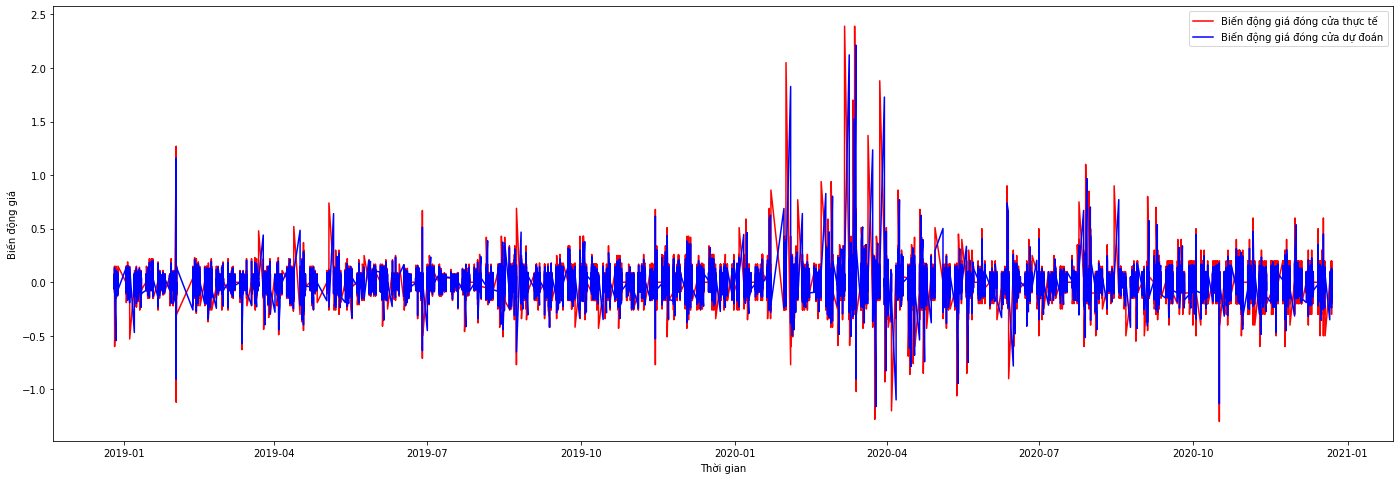

In [ ]:
plt.figure(figsize= (24,8))
plt.plot(datal['Volatility_Close'], label= 'Biến động giá đóng cửa thực tế', color= 'red')
plt.plot(datal['Volatility_Close_Pred'], label= 'Biến động giá đóng cửa dự đoán', color= 'blue')
plt.xlabel('Thời gian')
plt.ylabel('Biến động giá')
plt.legend()
plt.show()